# Week 1: Setup + EDA

## 1. Import Libraries

In [15]:
import pandas as pd
import numpy as np 

## 2. Import Data

In [21]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/user/.cache/kagglehub/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/versions/2


In [33]:
dataset = pd.read_csv("./dataset/heart_attack_prediction_dataset.csv")
print(dataset.columns)
dataset.columns = ['id', 'Age', 'Sex', 'Cholesterol', 'BloodPressure',
       'HeartRate', 'Diabetes', 'FamilyHistory', 'Smoking', 'Obesity',
       'AlcoholConsumption', 'ExerciseHoursPerWeek', 'Diet',
       'PreviousHeartProblems', 'MedicationUse', 'StressLevel',
       'SedentaryHoursPerDay', 'Income', 'BMI', 'Triglycerides',
       'PhysicalActivityDaysPerWeek', 'SleepHoursPerDay', 'Country',
       'Continent', 'Hemisphere', 'HeartAttackRisk']

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


## 3. Data Quality Checks

3.1 Missing Values

In [ ]:
# Get dataset info
#dataset.info()
#dataset.describe()
#print("is there any missing value", dataset.isnull().values.any())

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


3.2 Duplicates

In [28]:
# Create a boolean Series marking duplicates (True for duplicates)
is_duplicate = dataset.duplicated()

# View the duplicate rows
duplicate_rows = dataset[is_duplicate]

# Count the total number of duplicate rows
total_duplicates = is_duplicate.sum()

print(f"Total number of duplicate rows: {total_duplicates}")

Total number of duplicate rows: 0


3.3 Data Types Consistency

In [43]:
print(dataset.dtypes)

id                              object
Age                              int64
Sex                             object
Cholesterol                      int64
BloodPressure                   object
HeartRate                        int64
Diabetes                         int64
FamilyHistory                    int64
Smoking                          int64
Obesity                          int64
AlcoholConsumption               int64
ExerciseHoursPerWeek           float64
Diet                            object
PreviousHeartProblems            int64
MedicationUse                    int64
StressLevel                      int64
SedentaryHoursPerDay           float64
Income                           int64
BMI                            float64
Triglycerides                    int64
PhysicalActivityDaysPerWeek      int64
SleepHoursPerDay                 int64
Country                         object
Continent                       object
Hemisphere                      object
HeartAttackRisk          

3.4 Outliers (domain checks, IQR/z-score)

In [55]:
Q1 = dataset['BMI'].quantile(0.25)
Q3 = dataset['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Select outliers
outliers = dataset[(dataset['BMI'] < lower_bound) | (dataset['BMI'] > upper_bound)]

print("Number of outliers found:", len(outliers))

Number of outliers found: 0


## 4. Exploratory Data Analysis (EDA)

4.1 Univariate Distributions (histograms, KDE, boxplots)

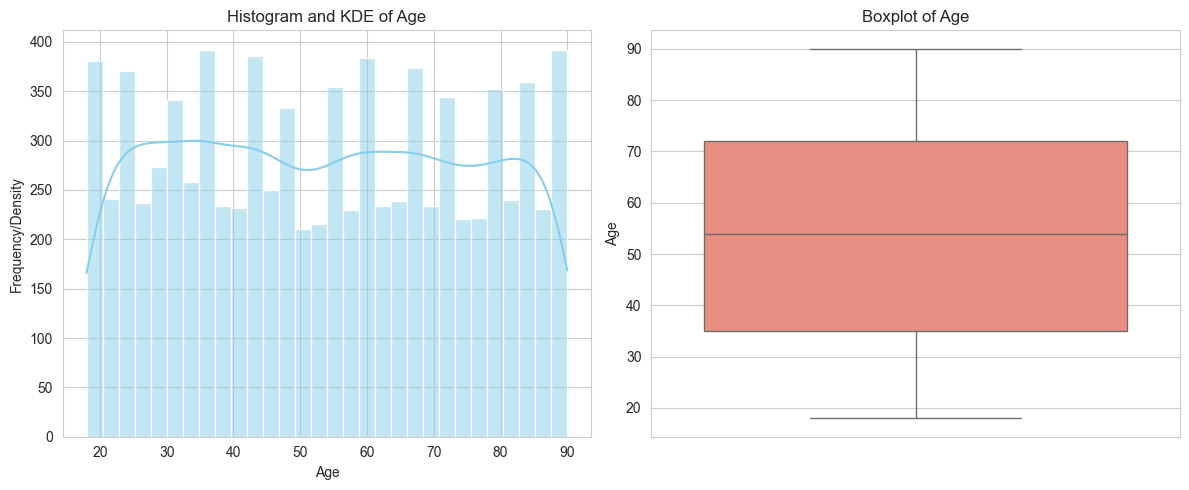

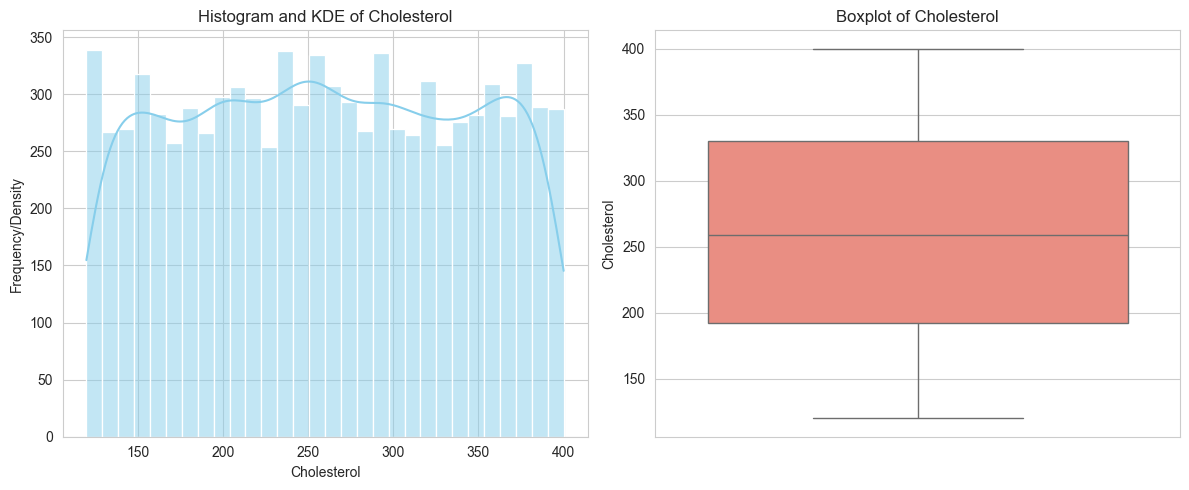

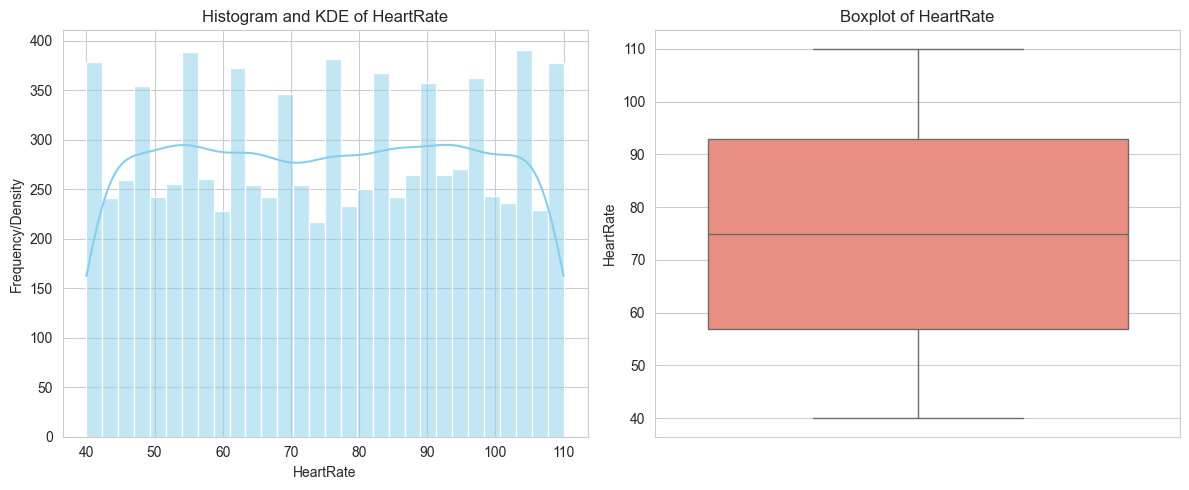

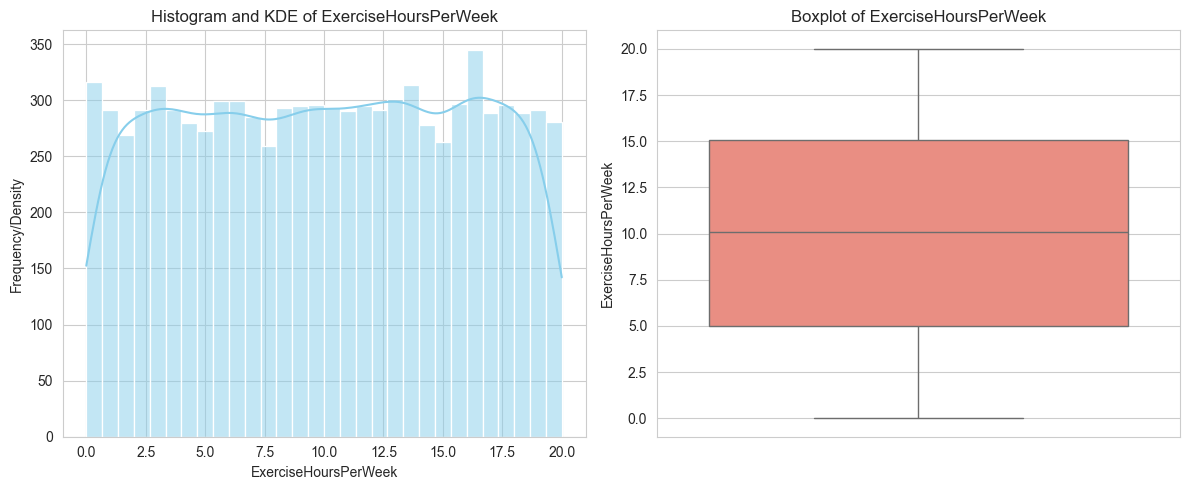

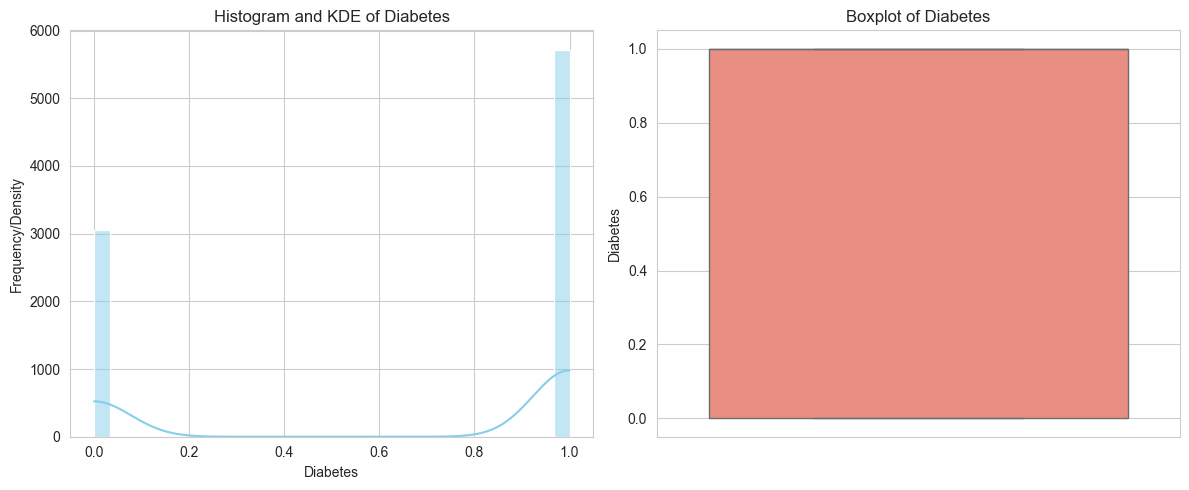

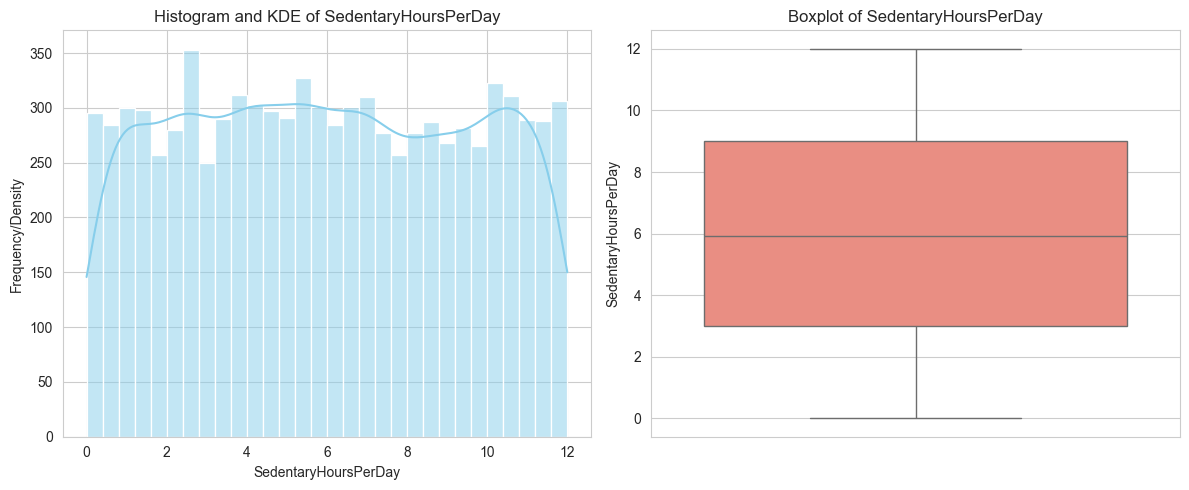

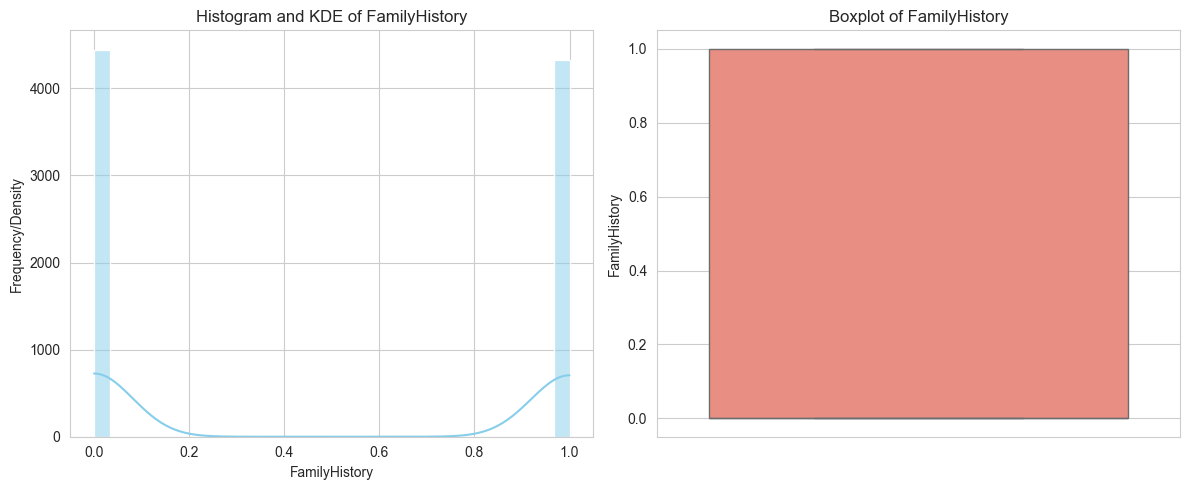

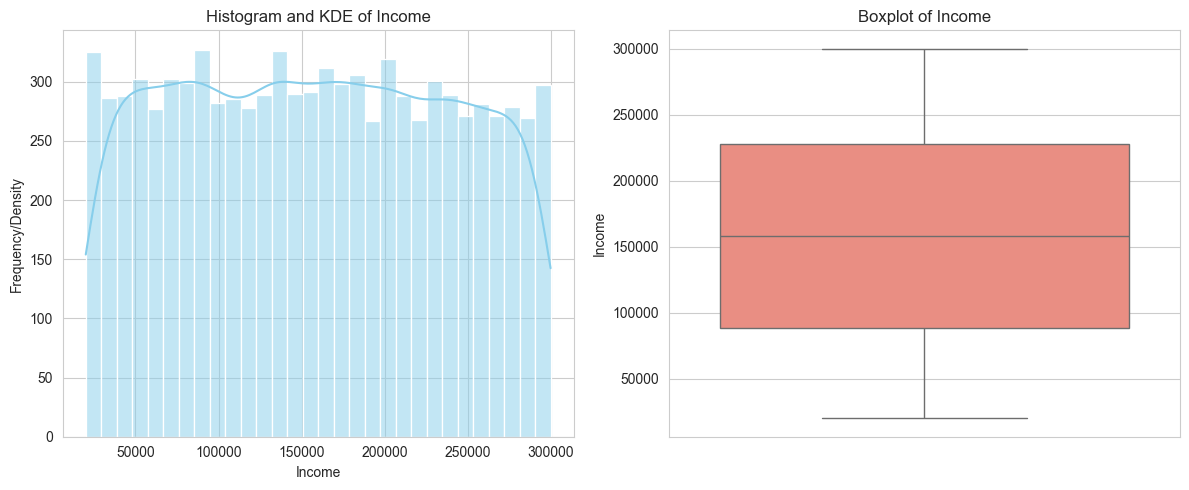

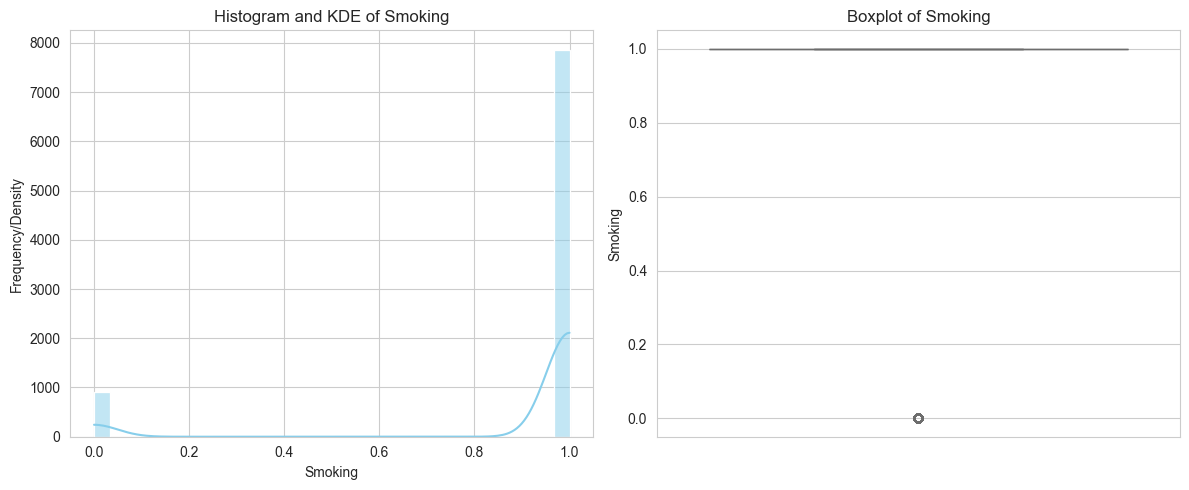

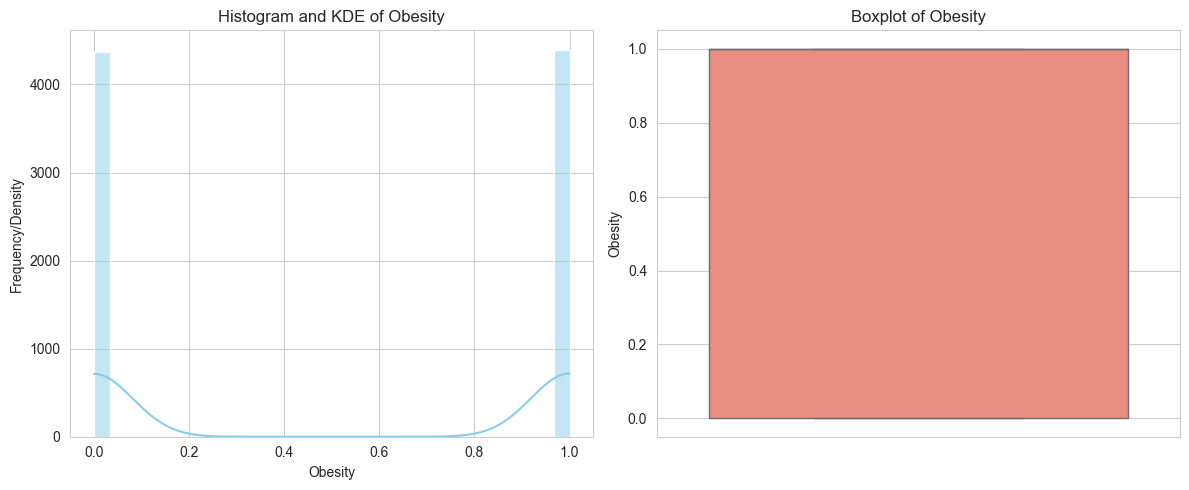

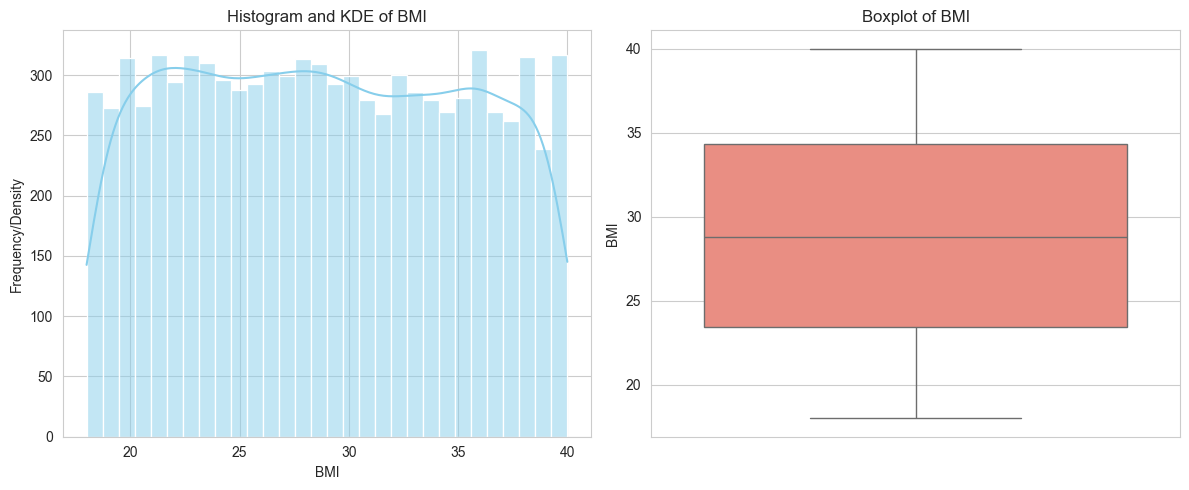

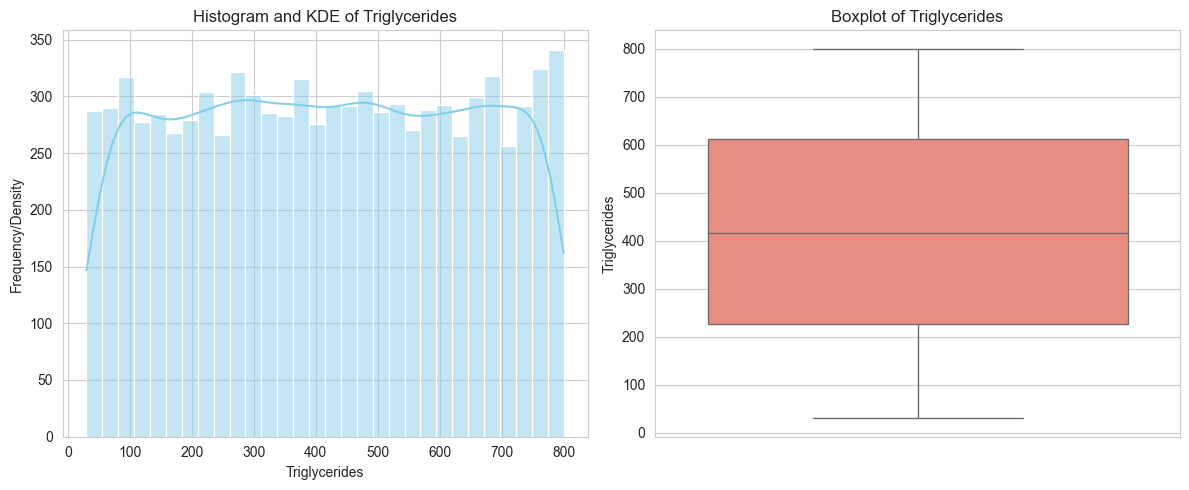

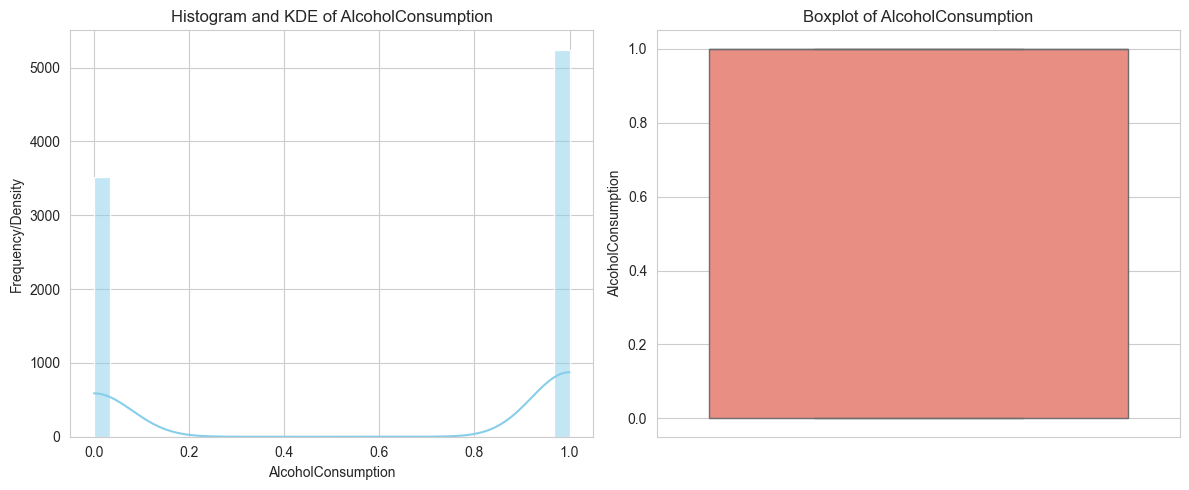

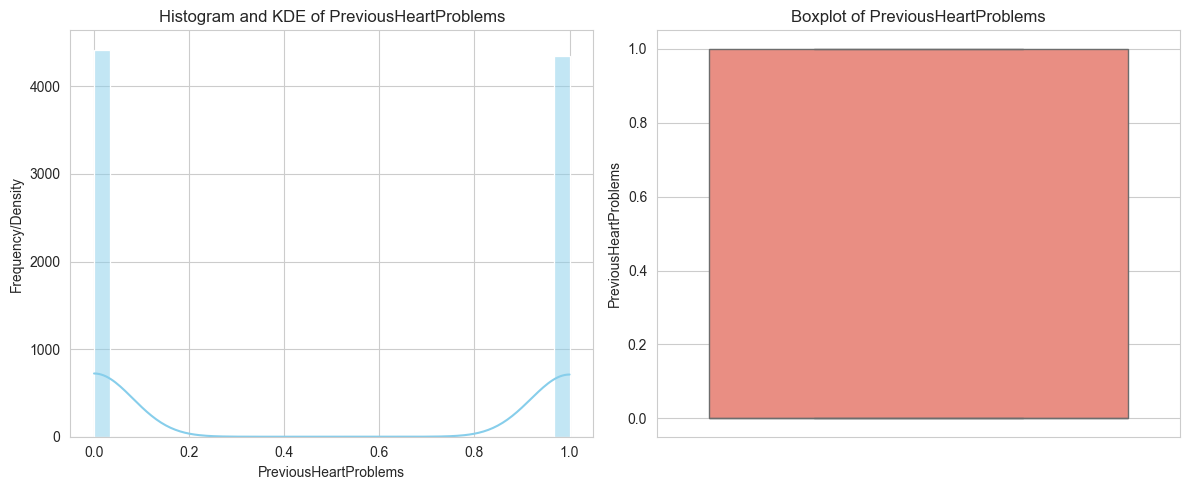

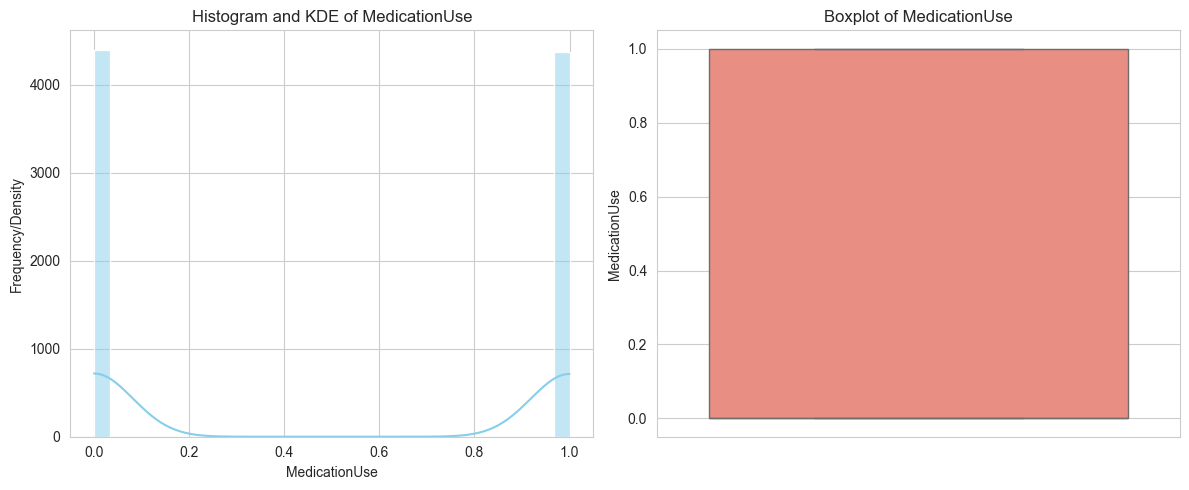

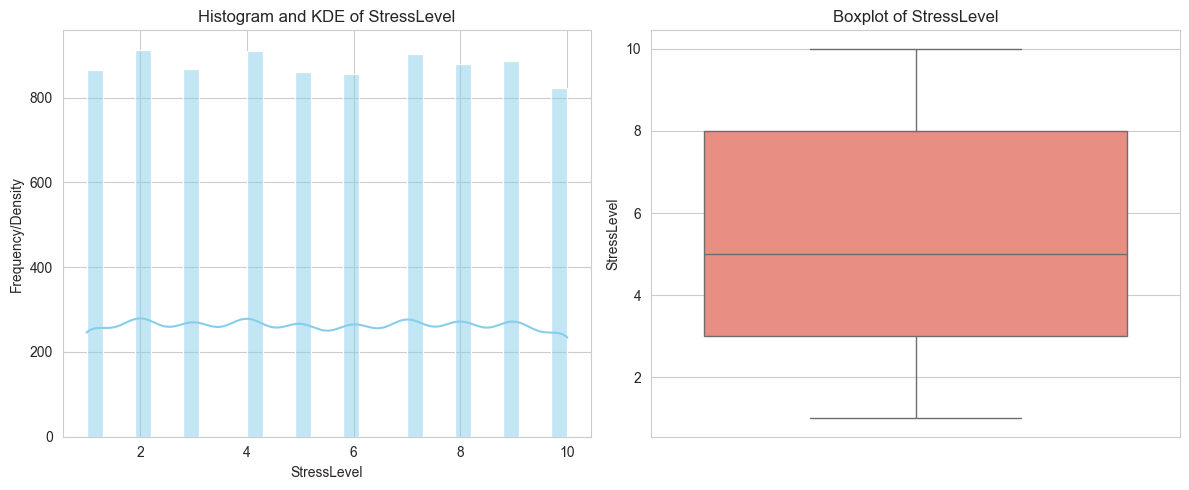

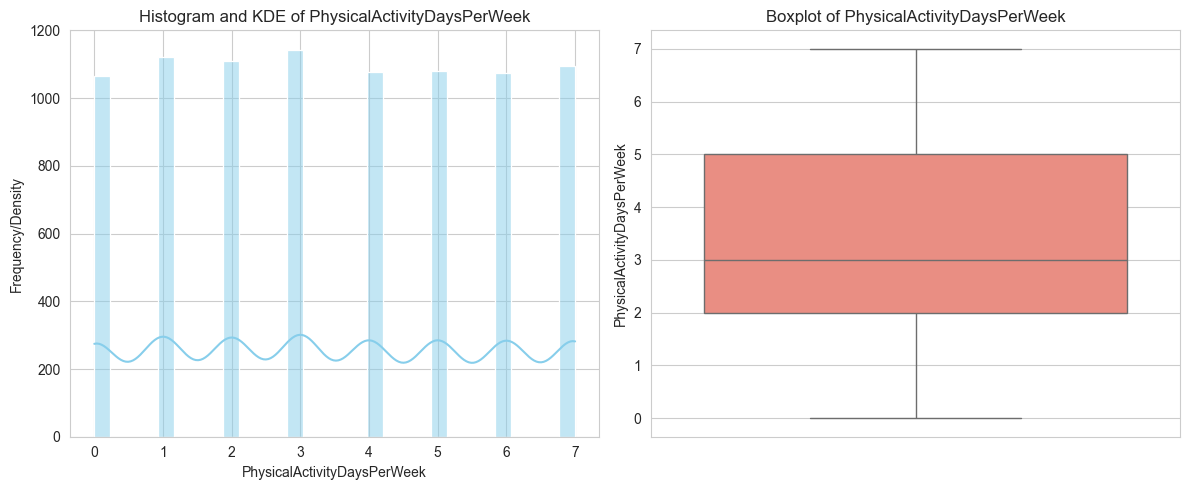

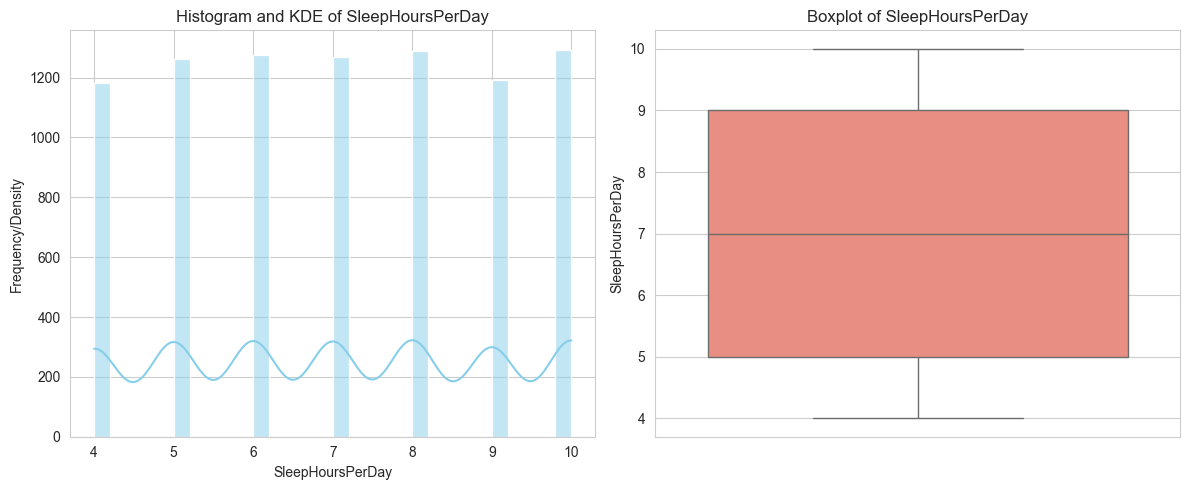

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = [
    'Age', 'Cholesterol', 'HeartRate', 'ExerciseHoursPerWeek', 'Diabetes',
    'SedentaryHoursPerDay','FamilyHistory', 'Income',
     'Smoking', 'Obesity', 'BMI', 'Triglycerides',
    'AlcoholConsumption', 'PreviousHeartProblems', 'MedicationUse', 
    'StressLevel' ,'PhysicalActivityDaysPerWeek', 'SleepHoursPerDay'
]

# Set visualization style
sns.set_style("whitegrid")

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Subplot 1: Histogram and KDE Plot
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram and KDE of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency/Density')

    # Subplot 2: Boxplot (for identifying outliers)
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataset[feature], color='salmon')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

4.2 Bivariate Relationships (scatter, groupby stats)

4.4 Target Variable (`y`) Inspection

4.5 Class Balance (counts, %)

## 5. Feature Engineering

5.1 Domain Features

5.2 Aggregations / Ratios / Interactions

5.3 Temporal/Recency Features (if applicable)

5.4 Feature Documentation (what, why, how)

## 6. Imbalance Handling (Preliminary)

6.1 Strategy Rationale (SMOTE vs. Class Weights vs. Thresholding)

6.2 Chosen Approach & Justification

6.3 Sanity Checks (no leakage, applied only to train)

---
# Week II–III: Data Preprocessing + Model Development

## 1. Preprocessing

1.1 Train/Validation/Test Split (with stratification if needed)

1.2 Categorical Encoding (label / one-hot)

1.3 Numeric Scaling (StandardScaler / MinMaxScaler)

1.4 Building Pipeline (ColumnTransformer + Pipeline)

## 2. Baseline Models

2.1 Logistic Regression (default settings)

2.2 Decision Tree (default settings)

2.3 Random Forest (default settings)

2.4 Fit → Predict → Evaluate (val set)

## 3. Boosting Experiments

3.1 XGBoost

3.2 LightGBM

## 4. Experiment Tracking (MLflow)

4.1 MLflow Setup (tracking URI, experiment name)

4.2 Log Params, Metrics, Artifacts

## 5. Evaluation & Diagnostics

## 6. Model Comparison

## 7. Hyperparameter Tuning

7.1 GridSearchCV / RandomizedSearchCV (CV strategy)

7.2 Best Params & CV Scores

7.3 Refit on Train+Val

## 8. Final Model Selection

8.1 Compare Tuned Models (val/test metrics)

8.2 Final Choice & Rationale

## 9. Save Preprocessing Pipeline + Model

---
# Week IV: Model Tuning + Deployment

## 1. Streamlit App

This step must be completed in a separate app.py file